In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import numpy as np
import scipy as sp
import os
from scipy.linalg import fractional_matrix_power

from jax import vmap, jit, numpy as jnp, random, lax, jvp, scipy as jsp
import matplotlib.pyplot as plt
import pickle
from functools import reduce

import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

module_path = os.path.abspath(os.path.join("/Users/shufay/Documents/ad_afqmc"))
if module_path not in sys.path:
    sys.path.append(module_path)

from ad_afqmc import (
    driver,
    pyscf_interface,
    mpi_jax,
    linalg_utils,
    lattices,
    propagation,
    wavefunctions,
    hamiltonian,
)

from pyscf import fci, gto, scf, mp, ao2mo

import itertools
from functools import partial

np.set_printoptions(precision=5, suppress=True)

# Hostname: Shus-MacBook-Pro-7.local
# System Type: Darwin
# Machine Type: x86_64
# Processor: i386


# 2D square

In [4]:
lattice_sq = lattices.two_dimensional_grid(4, 4)
n_sites = lattice_sq.n_sites
print(lattice_sq.__dict__)

{'l_x': 4, 'l_y': 4, 'shape': (4, 4), 'shell_distances': (0, 1, 2, 4, 5, 8), 'bond_shell_distances': (0, 2, 4, 8, 10, 16, 18, 20, 32), 'sites': ((0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)), 'bonds': ((0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3)), 'n_sites': 16, 'hop_signs': (-1.0, -1.0, 1.0, 1.0), 'coord_num': 4}


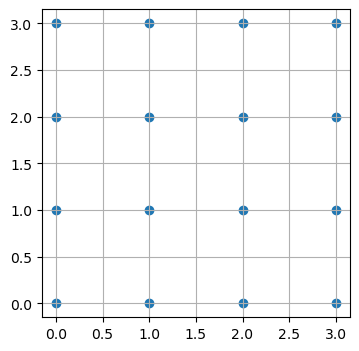

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sites = np.array(lattice_sq.sites)
ax.scatter(sites[:, 0], sites[:, 1])
ax.grid()
ax.set_aspect('equal')

# 2D triangular

## 4x4

In [65]:
lattice_tri = lattices.triangular_grid(4, 4)
n_sites = lattice_tri.n_sites
print(lattice_tri.__dict__)

{'l_x': 4, 'l_y': 4, 'shape': (4, 4), 'sites': ((0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)), 'n_sites': 16, 'coord_num': 6, 'open_x': False}


In [66]:
sites = lattice_tri.sites
coords = np.array([lattice_tri.get_site_coordinate(site) for site in sites])

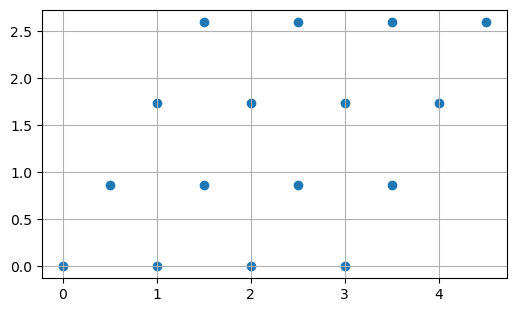

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(coords[:, 0], coords[:, 1])
ax.grid()
ax.set_aspect('equal')

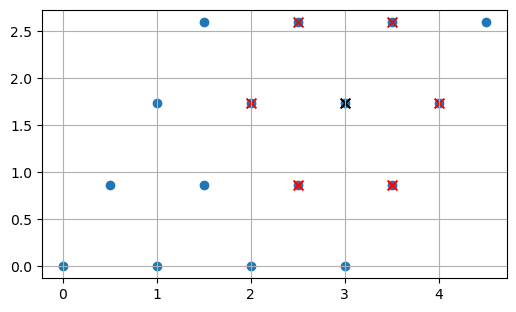

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (2, 2)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

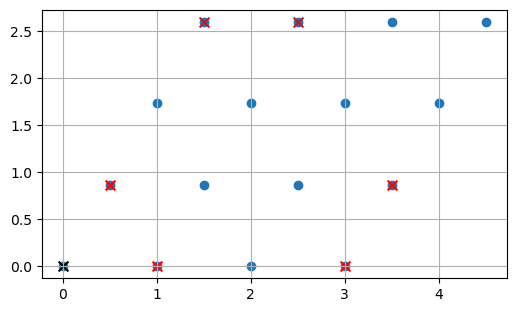

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

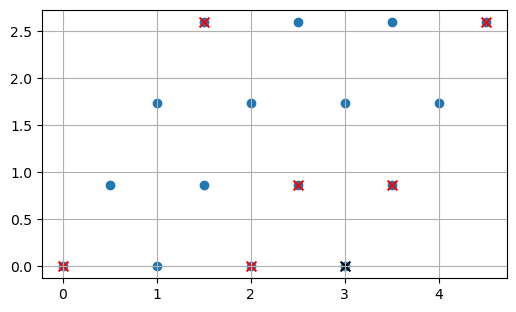

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (3, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

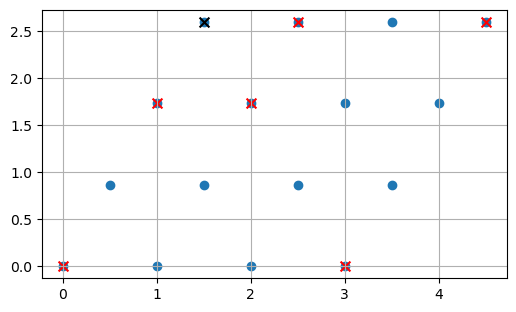

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 3)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

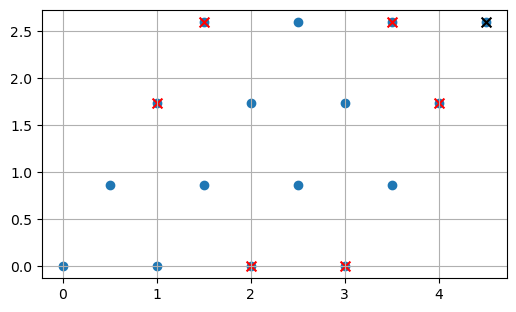

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (3, 3)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

## Open x

In [73]:
lattice_tri.open_x = True
coords = np.array([lattice_tri.get_site_coordinate(site) for site in sites])

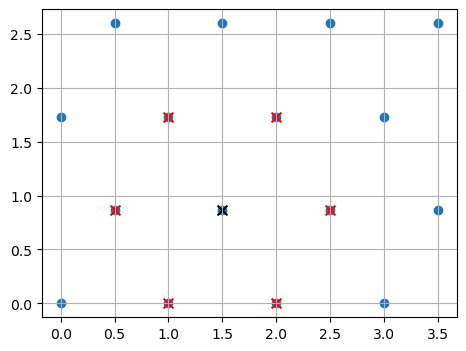

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (1, 1)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

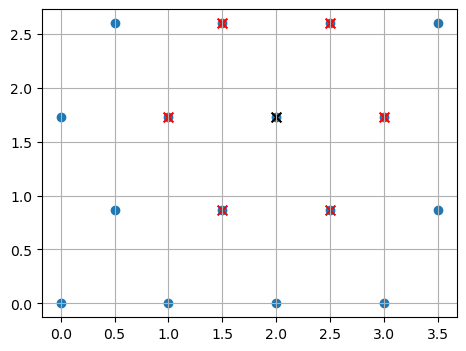

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (2, 2)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

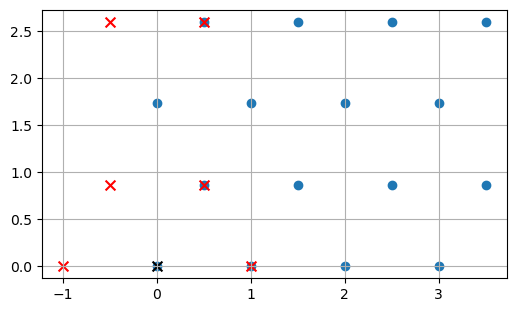

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

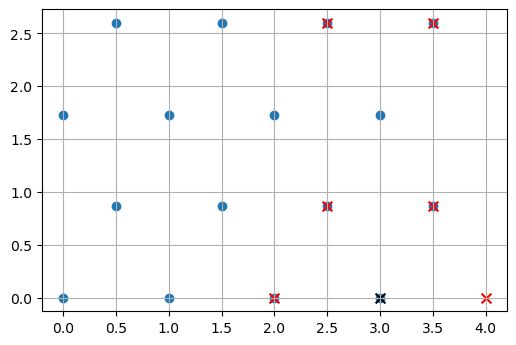

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (3, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

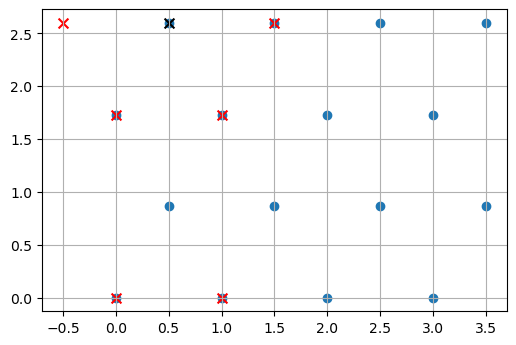

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 3)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

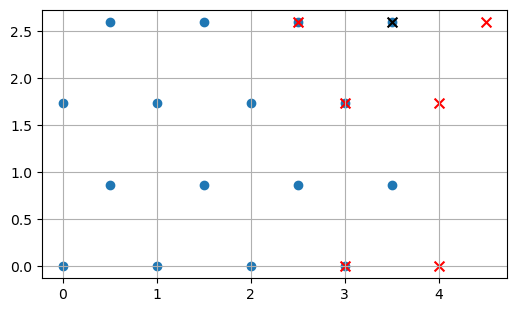

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (3, 3)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

## 6x6

In [88]:
lattice_tri = lattices.triangular_grid(6, 6)
n_sites = lattice_tri.n_sites
print(lattice_tri.__dict__)

{'l_x': 6, 'l_y': 6, 'shape': (6, 6), 'sites': ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)), 'n_sites': 36, 'coord_num': 6, 'open_x': False}


In [89]:
sites = lattice_tri.sites
coords = np.array([lattice_tri.get_site_coordinate(site) for site in sites])

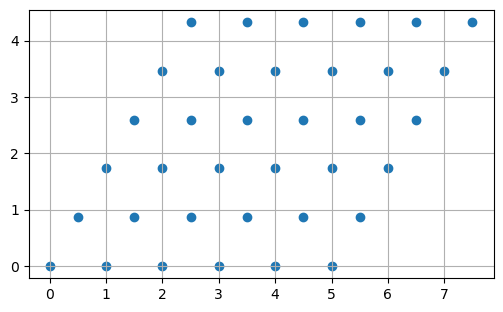

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(coords[:, 0], coords[:, 1])
ax.grid()
ax.set_aspect('equal')

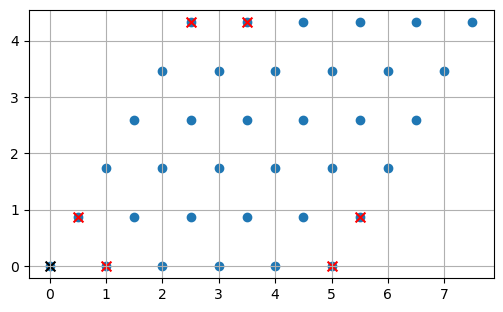

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

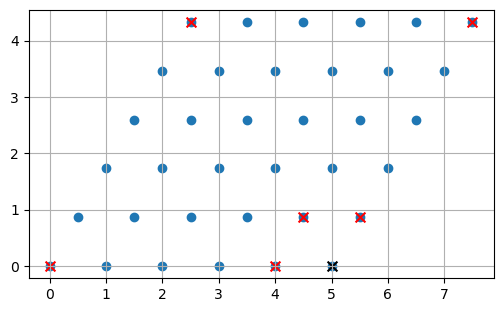

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (5, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

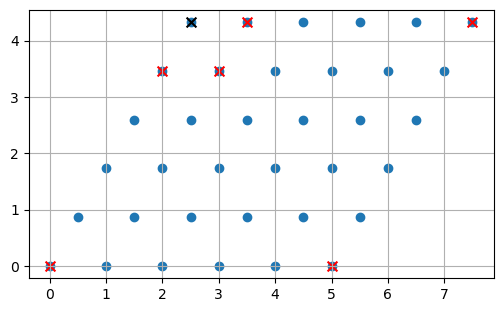

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 5)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

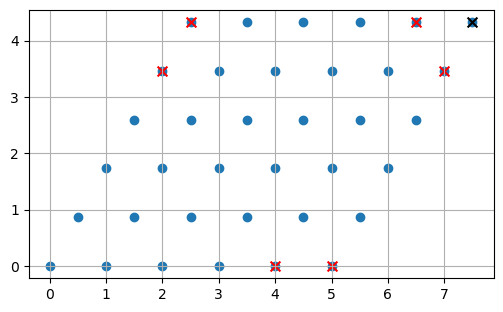

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (5, 5)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

## Open x

In [100]:
lattice_tri.open_x = True
coords = np.array([lattice_tri.get_site_coordinate(site) for site in sites])

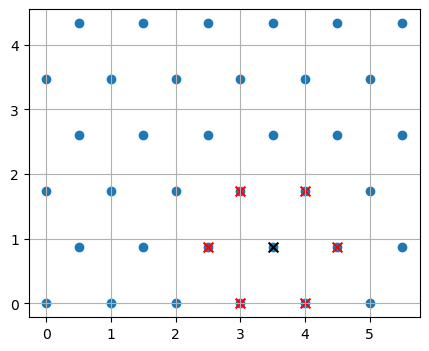

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (3, 1)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

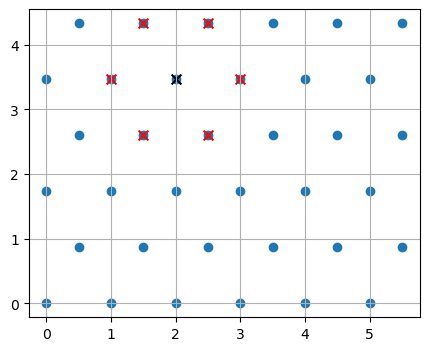

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (2, 4)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

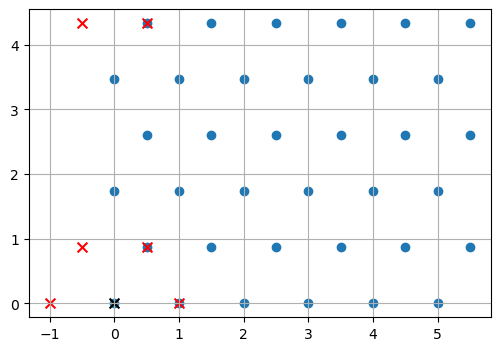

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

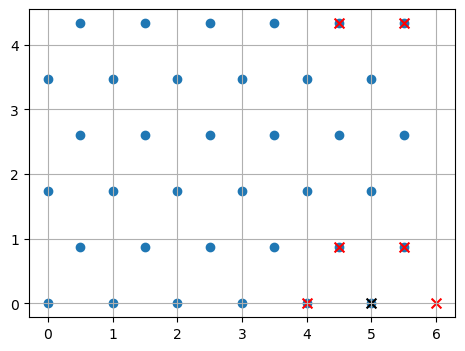

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (5, 0)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

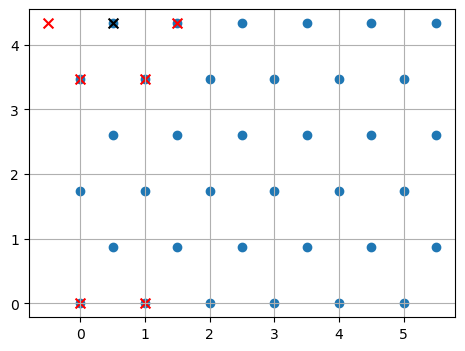

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (0, 5)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')

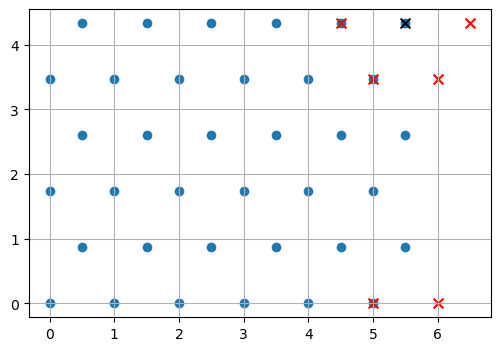

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

end = 1000
ax.scatter(coords[:end, 0], coords[:end, 1])

site = (5, 5)
coord = lattice_tri.get_site_coordinate(site)
nn = lattice_tri.get_nearest_neighbors(site)
nn_coords = np.array([lattice_tri.get_site_coordinate(site) for site in nn])
ax.scatter(nn_coords[:, 0], nn_coords[:, 1], label='NN', marker='x', s=50, color='r')
ax.scatter(coord[0], coord[1], label='ref', marker='x', s=50, color='k')

ax.grid()
ax.set_aspect('equal')